In [15]:
from train import train
from markup import markup
from apply import integrate_image_signal_over_channels
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Train part (if necessary)

In [2]:
train(coco_json_path='./jsons/coco_all_labels.json', 
             train_images_path='./train_images/', target_channel_names='dapi,lipid', train_directory='.',
          validate=True, device='cpu', num_epochs=10, model_name='unet', init_features=10)

Epoch number: 0
validation iou is 0.07770653649888527
Training epoch loss: 0.7359527349472046
Epoch 1 of 10 took 2.777s
Epoch number: 1
validation iou is 0.10209567558768669
Training epoch loss: 0.7162428498268127
Epoch 2 of 10 took 2.098s
Epoch number: 2
validation iou is 0.14334942606082895
Training epoch loss: 0.7380218505859375
Epoch 3 of 10 took 2.095s
Epoch number: 3
validation iou is 0.19555626708970605
Training epoch loss: 0.582599401473999
Epoch 4 of 10 took 2.225s
Epoch number: 4
validation iou is 0.2662455037604912
Training epoch loss: 0.5709911584854126
Epoch 5 of 10 took 2.095s
Epoch number: 5
validation iou is 0.3146758619282504
Training epoch loss: 0.5896517038345337
Epoch 6 of 10 took 2.081s
Epoch number: 6
validation iou is 0.37743144510864407
Training epoch loss: 0.5462974309921265
Epoch 7 of 10 took 2.206s
Epoch number: 7
validation iou is 0.42949653228868945
Training epoch loss: 0.395839661359787
Epoch 8 of 10 took 2.196s
Epoch number: 8
validation iou is 0.46876507

## Load model

In [8]:
import torch
from Unet import UNet

unet = UNet(in_channels=2, init_features=10)
unet.load_state_dict(torch.load('./unet'))

<All keys matched successfully>

## Markup of validation images


In [10]:
markup(model_path='./models/unet_60_epochs_lipids_dapi', markup_images_path='val_images/', 
       target_channel_names='dapi,lipid', 
       save_path='./markuped_vals/', if_binary_mask=True)

## Calculate integrated signal from the cells' nucleis in each chanel

In [11]:
integrated_signal_dict = integrate_image_signal_over_channels(masks_directory_path='markuped_vals/',
                                                              images_path='val_images/',
                                                              target_channel_names='dapi,lipid',
                                                              interest_mask='dapi_0_0.tif', save=False)                                                            

In [12]:
integrated_signal_dict

{'dapi': {'dapi_0_0.tif': 1107947}, 'lipid': {'lipid_0_0.tif': 582395}}

In [13]:
#Sanity Check
import skimage 

mask = skimage.io.imread('markuped_vals/dapi_0_0.tif')
image = skimage.io.imread('val_images/dapi/dapi_0_0.tif')
integrated_signal = (mask * image).sum()
print(f'Integrated signal={integrated_signal}')

Integrated signal=1107947.0


In [ ]:
def show_predictions(image_index, image_subindex):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    ax1.imshow(skimage.io.imread(f'./val_images/dapi/dapi_{image_index}_{image_subindex}.tif'))
    ax2.imshow(skimage.io.imread(f'./markuped_vals/dapi_{image_index}_{image_subindex}.tif'), 'gray')
    ax3.imshow(skimage.io.imread(f'./val_masks/{image_index}_{image_subindex}.tif'), 'gray')

    ax1.set_title('image')
    ax2.set_title('prediceted mask')
    ax3.set_title('annotated mask')

    plt.show()

show_predictions(0, 8)

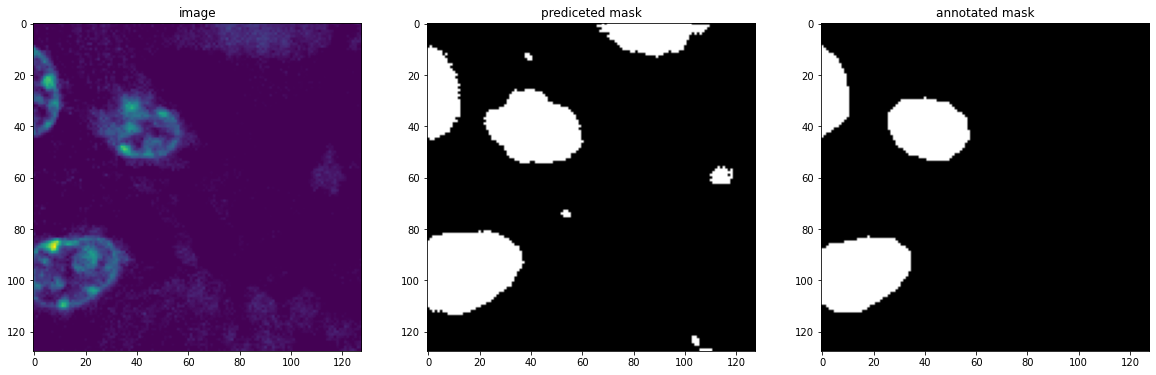